In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="darkgrid")
sns.set_context(rc={"xtick.labelsize":12,"axes.labelsize":15})

In [2]:
el = pd.read_csv('Elspotprices.csv', sep=';', decimal=',')
el = el.drop(['HourUTC','SpotPriceEUR'],axis=1)
el['HourDK'] = pd.to_datetime(el['HourDK'])

el_dk1 = el[el['PriceArea']=='DK1']

timestamps = pd.DataFrame()
timestamps['HourDK'] = pd.date_range(el['HourDK'].min(), el['HourDK'].max(),freq='H')

el_dk1=el_dk1.merge(timestamps,on='HourDK',how='right')

el_dk1 = el_dk1.ffill() 

el_dk1 = el_dk1.set_index('HourDK')
el_dk1 = el_dk1.drop(['PriceArea'],axis=1)

In [3]:
el_all  = el_dk1.loc["2019-01-01 00:00:00":"2022-12-31 23:00:00"]/1000
el_low  = el_dk1.loc["2019-01-01 00:00:00":"2019-12-31 23:00:00"]/1000
el_high = el_dk1.loc["2022-01-01 00:00:00":"2022-12-31 23:00:00"]/1000

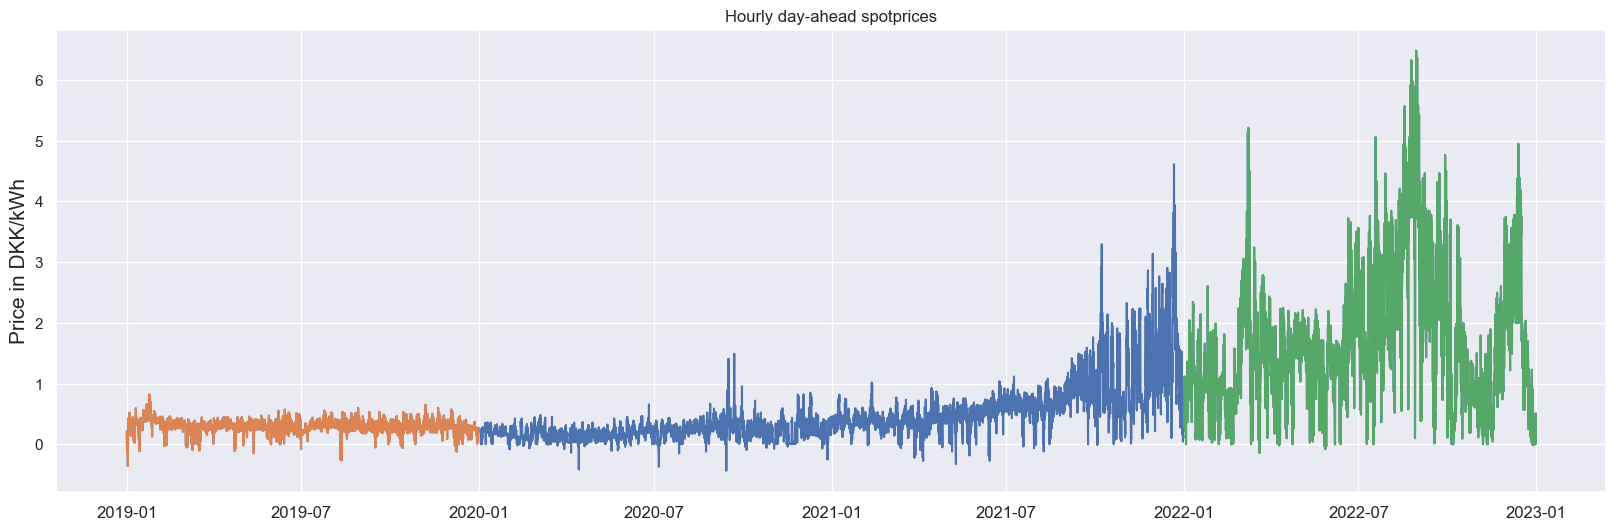

In [14]:
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(el_all)
plt.plot(el_low)
plt.plot(el_high)
plt.ylabel("Price in DKK/kWh")
plt.title("Hourly day-ahead spotprices")
plt.savefig("spotprices.png")
plt.show()

In [5]:
df_high = el_high.copy()
df_high['year']=df_high.index.year
df_high['month']=df_high.index.month
df_high['weekday']=df_high.index.weekday
df_high['hour']=df_high.index.hour

df_low = el_low.copy()
df_low['year']=df_low.index.year
df_low['month']=df_low.index.month
df_low['weekday']=df_low.index.weekday
df_low['hour']=df_low.index.hour

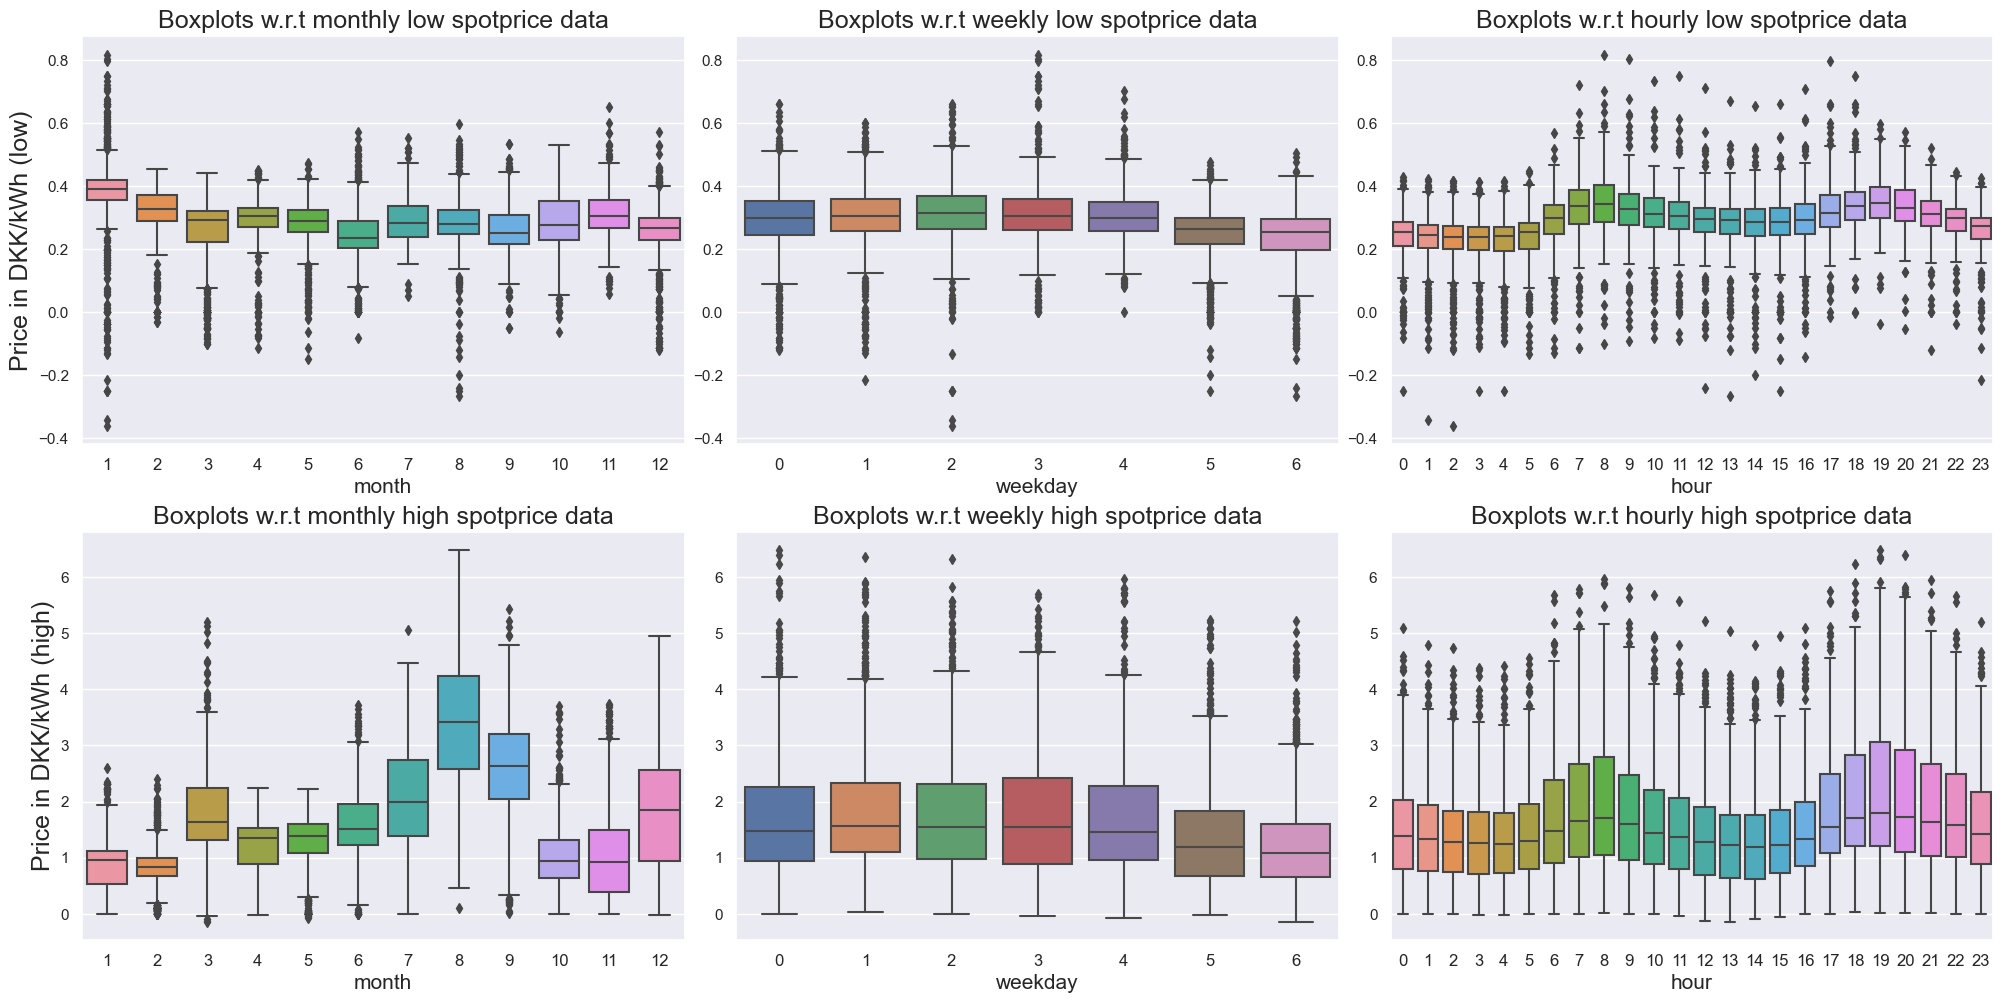

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3)


sns.boxplot(x='month', y="SpotPriceDKK", data=df_low, ax=axes[0,0])
sns.boxplot(x='weekday', y="SpotPriceDKK", data=df_low, ax=axes[0,1])
sns.boxplot(x='hour', y="SpotPriceDKK", data=df_low, ax=axes[0,2])
axes[0,0].set_title(f'Boxplots w.r.t monthly low spotprice data', fontsize=18)
axes[0,1].set_title(f'Boxplots w.r.t weekly low spotprice data', fontsize=18)
axes[0,2].set_title(f'Boxplots w.r.t hourly low spotprice data', fontsize=18)
axes[0,0].set_ylabel("Price in DKK/kWh (low)", size=18) 
axes[0,1].set_ylabel('', size=18) 
axes[0,2].set_ylabel('', size=18) 


sns.boxplot(x='month', y="SpotPriceDKK", data=df_high, ax=axes[1,0])
sns.boxplot(x='weekday', y="SpotPriceDKK", data=df_high, ax=axes[1,1])
sns.boxplot(x='hour', y="SpotPriceDKK", data=df_high, ax=axes[1,2])
axes[1,0].set_title(f'Boxplots w.r.t monthly high spotprice data', fontsize=18)
axes[1,1].set_title(f'Boxplots w.r.t weekly high spotprice data', fontsize=18)
axes[1,2].set_title(f'Boxplots w.r.t hourly high spotprice data', fontsize=18)
axes[1,0].set_ylabel("Price in DKK/kWh (high)", size=18) 
axes[1,1].set_ylabel('', size=18) 
axes[1,2].set_ylabel('', size=18) 

fig.tight_layout(pad=0.5)
plt.savefig("spotprices_boxplots.png")
plt.show()

In [20]:
print(np.mean(el_low["SpotPriceDKK"]))
print(np.mean(el_high["SpotPriceDKK"]))

0.2873843386426208
1.6294371796559746


In [7]:
#Emissions data clean
em = pd.read_csv('carbon_emissions_data.csv', sep=',', decimal='.')
em = em.drop(['Unnamed: 0'], axis=1)
em['Minutes5DK'] = pd.to_datetime(em['Minutes5DK'])
em_dk1 = em[em['PriceArea']=='DK1']
em_dk1 = em_dk1.drop(['PriceArea'], axis=1)

timestamps = pd.DataFrame()
timestamps['Minutes5DK'] = pd.date_range(em['Minutes5DK'].min(), em['Minutes5DK'].max(),freq='5T')

em_dk1 = em_dk1.merge(timestamps,on='Minutes5DK',how='right')

em_dk1 = em_dk1.ffill() 

em_dk1 = em_dk1.set_index('Minutes5DK')

em_dk1 = em_dk1.asfreq('H')

em_dk1["Time"] = em_dk1.index
em_dk1 = em_dk1.set_index("Time")

In [8]:
em_all  = em_dk1.loc["2019-01-01 00:00:00":"2022-12-31 23:00:00"]/1000

In [9]:
em_all['year']=em_all.index.year
em_all['month']=em_all.index.month
em_all['weekday']=em_all.index.weekday
em_all['hour']=em_all.index.hour

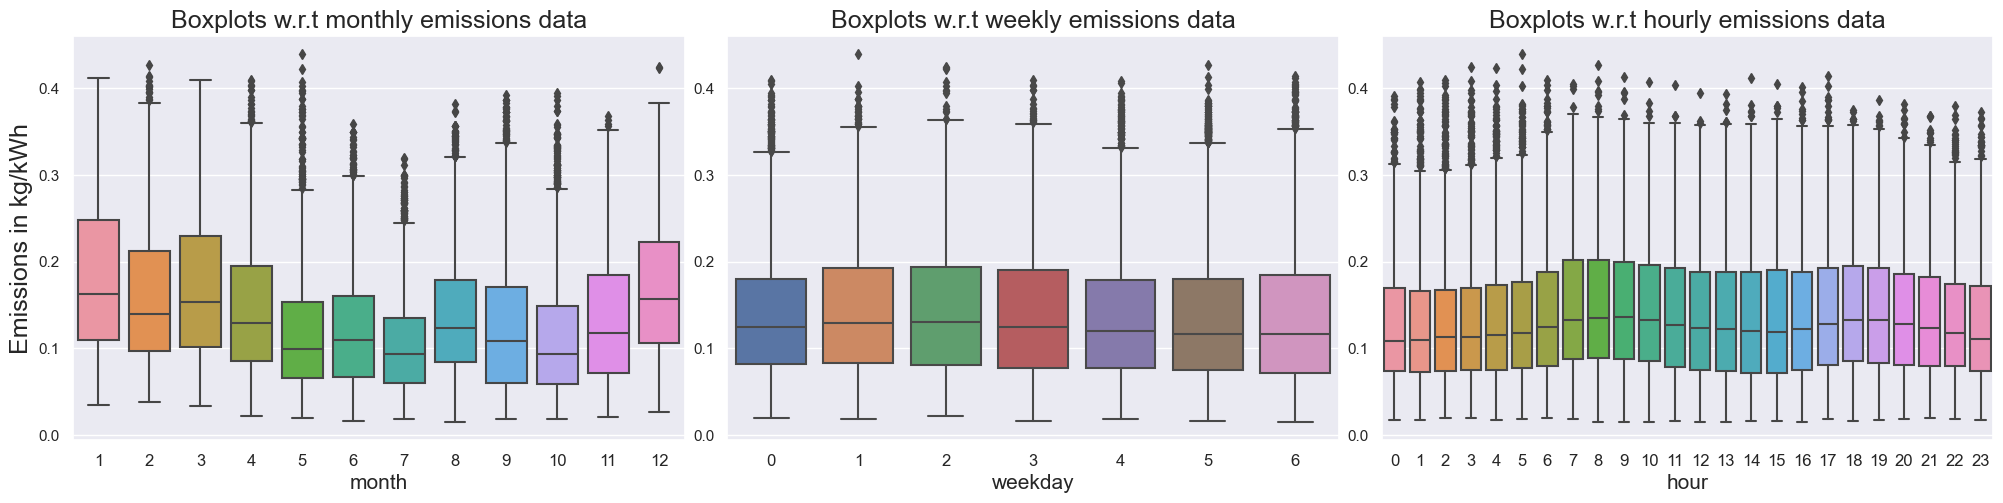

In [16]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1,3)

sns.boxplot(x='month', y="CO2Emission", data=em_all, ax=axes[0])
sns.boxplot(x='weekday', y="CO2Emission", data=em_all, ax=axes[1])
sns.boxplot(x='hour', y="CO2Emission", data=em_all, ax=axes[2])
axes[0].set_title(f'Boxplots w.r.t monthly emissions data', fontsize=18)
axes[1].set_title(f'Boxplots w.r.t weekly emissions data', fontsize=18)
axes[2].set_title(f'Boxplots w.r.t hourly emissions data', fontsize=18)
axes[0].set_ylabel("Emissions in kg/kWh", size=18) 
axes[1].set_ylabel('', size=18) 
axes[2].set_ylabel('', size=18) 

fig.tight_layout(pad=0.5)
plt.savefig("emissions_boxplots.png")
plt.show()